<a href="https://colab.research.google.com/github/otakumesi/python-machine-learning-programming/blob/master/python_machine_learning_programming_part_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

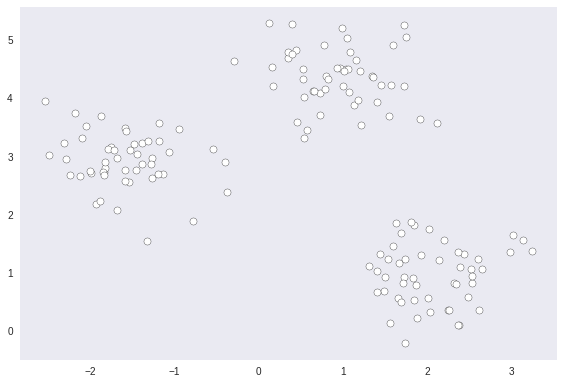

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

plt.show()

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)

y_km = km.fit_predict(X)

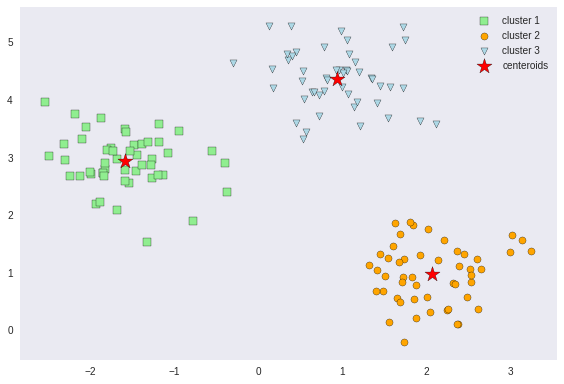

In [3]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, color='lightgreen', edgecolor='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, color='orange', edgecolor='black', marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, color='lightblue', edgecolor='black', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, color='red', edgecolor='black', marker='*', label='centeroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

plt.show()

In [4]:
print("Distortion: %.2f" % km.inertia_)

Distortion: 72.48


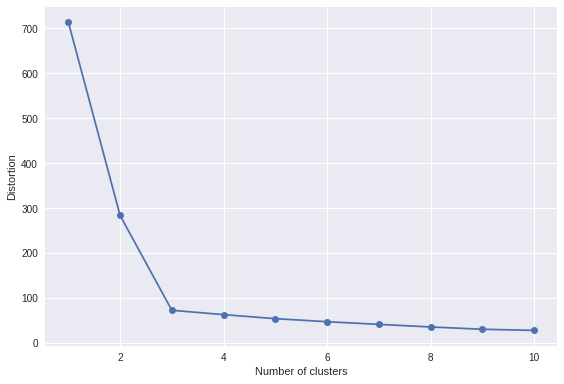

In [5]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

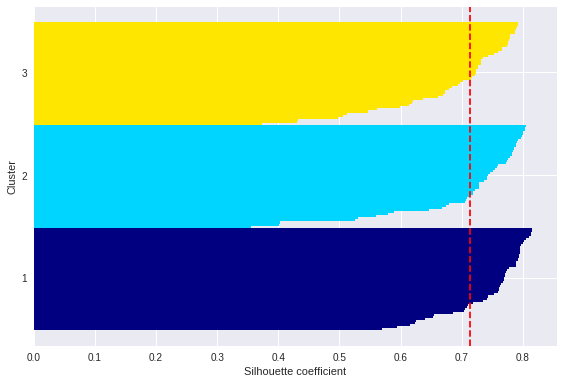

In [6]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

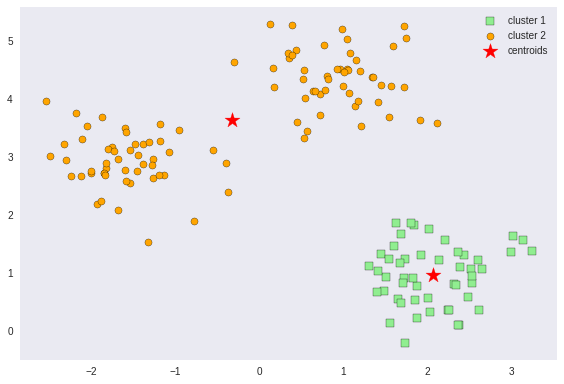

In [7]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

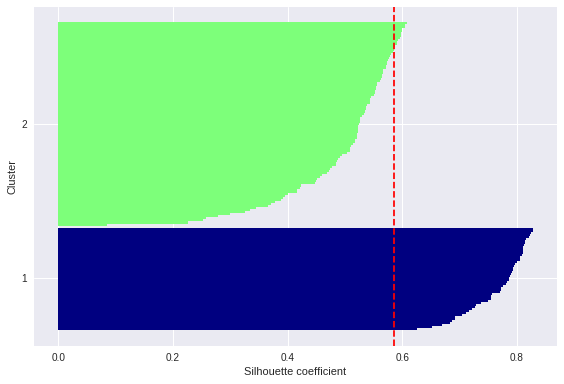

In [8]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0

yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)
  
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [0]:
import pandas as pd
import numpy as np
np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)

In [10]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [11]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [12]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [13]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [14]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of  items in clust.'], index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


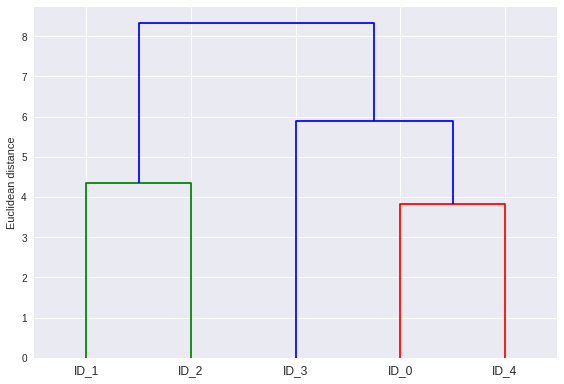

In [15]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)
plt.ylabel('Euclidean distance')
plt.tight_layout()
plt.show()

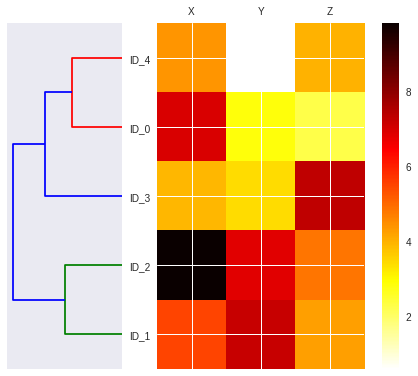

In [16]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
  i.set_visible(False)

fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [18]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


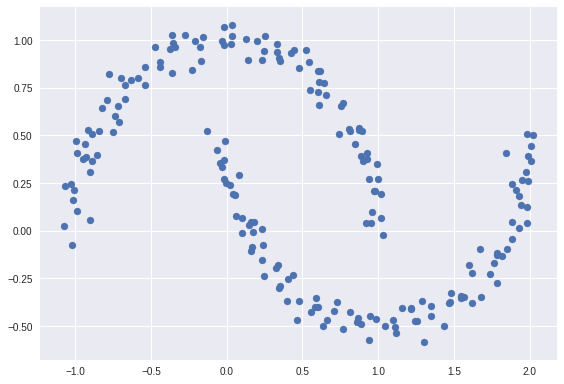

In [20]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

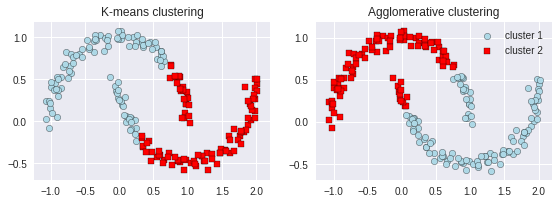

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

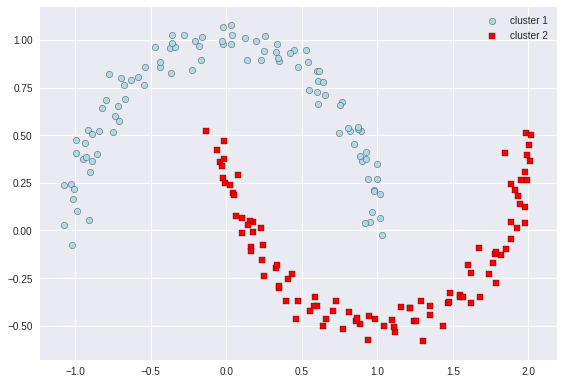

In [22]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], edgecolors='black', c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], edgecolors='black', c='red', marker='s', s=40, label='cluster 2')

plt.legend()
plt.tight_layout()
plt.show()